In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pyvis.network import Network


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/global-air-transportation-network-mapping-the-wo")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\I745988\.cache\kagglehub\datasets\thedevastator\global-air-transportation-network-mapping-the-wo\versions\2


In [3]:
airplanes = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/airplanes.csv")
airlines = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/airlines.csv")
airports = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/airports.csv")
routes = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/routes.csv")

In [4]:
airplanes

,index,Name,IATA code,ICAO code
0,0,Aerospatiale (Nord) 262,ND2,N262
1,1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,2,Aerospatiale SN.601 Corvette,NDC,S601
3,3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,4,Aerospatiale/Alenia ATR 42-500,AT5,AT45
...,...,...,...,...
241,241,Tupolev Tu-144,\N,T144
242,242,Tupolev Tu-154,TU5,T154
243,243,Tupolev Tu-204,T20,T204
244,244,Yakovlev Yak-40,YK4,YK40


In [5]:
airlines

,index,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
...,...,...,...,...,...,...,...,...,...
6157,6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6158,6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6159,6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6160,6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y


In [6]:
airports

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [7]:
routes

,index,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...,...
67658,67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [8]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       6162 non-null   int64 
 1   Airline ID  6162 non-null   int64 
 2   Name        6162 non-null   object
 3   Alias       5656 non-null   object
 4   IATA        1535 non-null   object
 5   ICAO        6075 non-null   object
 6   Callsign    5354 non-null   object
 7   Country     6147 non-null   object
 8   Active      6162 non-null   object
dtypes: int64(2), object(7)
memory usage: 433.4+ KB


In [9]:
# Data cleaning
# Drop rows with missing IATA codes in the airports and routes files
airports.dropna(subset=['IATA'], inplace=True)
routes.dropna(subset=['Source airport', 'Destination airport'], inplace=True)

# Remove duplicate rows in routes
routes.drop_duplicates(inplace=True)

In [10]:
# Merge routes with airport data (latitude and longitude for source and destination)
routes = pd.merge(routes, airports[['IATA', 'Latitude', 'Longitude']], 
                   left_on='Source airport', right_on='IATA', how='left')
routes = pd.merge(routes, airports[['IATA', 'Latitude', 'Longitude']], 
                   left_on='Destination airport', right_on='IATA', how='left', suffixes=('_source', '_dest'))

In [11]:
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
from geopy.distance import geodesic

# Function to calculate distance with handling for missing or invalid coordinates
def calculate_distance(row):
    # Check if either latitude or longitude is NaN for source or destination
    if pd.isna(row['Latitude_source']) or pd.isna(row['Longitude_source']) or \
       pd.isna(row['Latitude_dest']) or pd.isna(row['Longitude_dest']):
        return None  # Return None for invalid coordinates
    
    # Calculate the geodesic distance if coordinates are valid
    source_coords = (row['Latitude_source'], row['Longitude_source'])
    dest_coords = (row['Latitude_dest'], row['Longitude_dest'])
    
    try:
        return geodesic(source_coords, dest_coords).kilometers
    except ValueError:
        return None  # In case of any other invalid coordinates, return None

# Apply the function to calculate distance
routes['distance_km'] = routes.apply(calculate_distance, axis=1)

# Drop rows with invalid distance values (None)
routes.dropna(subset=['distance_km'], inplace=True)

# Check the results
print(routes[['Source airport', 'Destination airport', 'distance_km']].head())


  Source airport Destination airport  distance_km
0            AER                 KZN  1507.989680
1            ASF                 KZN  1040.943207
2            ASF                 MRV   449.036664
3            CEK                 KZN   773.126239
4            CEK                 OVB  1343.161122


In [13]:
# Merge routes with airline data to get the airline name for each route
routes = pd.merge(routes, airlines[['IATA', 'Name']], 
                   left_on='Airline', right_on='IATA', how='left')

In [14]:
# Create the network graph
G = nx.Graph()  # You can use nx.DiGraph() for a directed graph if necessary

# Add nodes (airports)
for _, airport in airports.iterrows():
    G.add_node(airport['IATA'], label=airport['Name'], country=airport['Country'], 
               latitude=airport['Latitude'], longitude=airport['Longitude'])

# Add edges (routes)
for _, route in routes.iterrows():
    G.add_edge(route['Source airport'], route['Destination airport'], 
               weight=route['distance_km'], airline=route['Name'], 
               stops=route['Stops'], equipment=route['Equipment'])


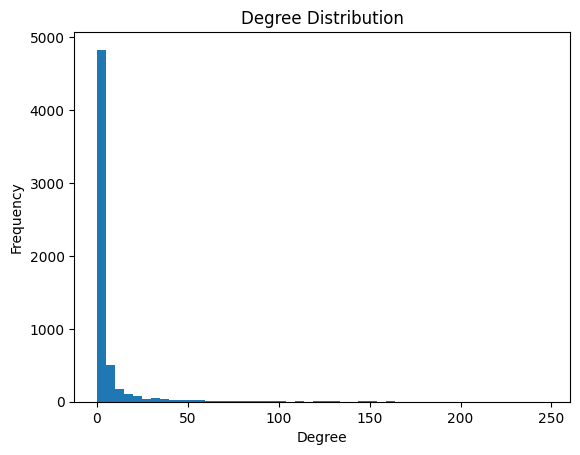

In [15]:

# Network Analysis Example: Degree Distribution
degree_sequence = [G.degree(node) for node in G.nodes()]
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

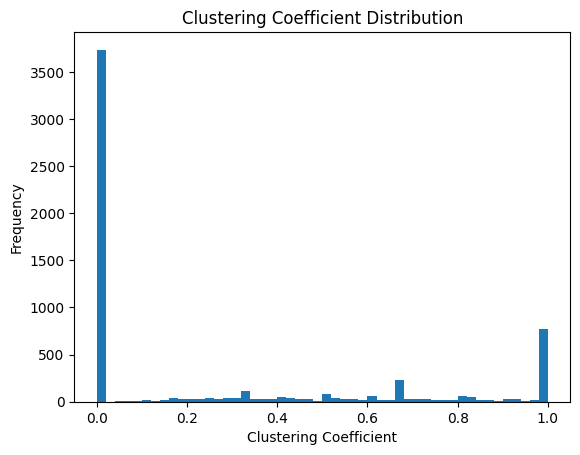

In [16]:

# Clustering Coefficient Example
clustering_coeff = nx.clustering(G)
plt.hist(list(clustering_coeff.values()), bins=50)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

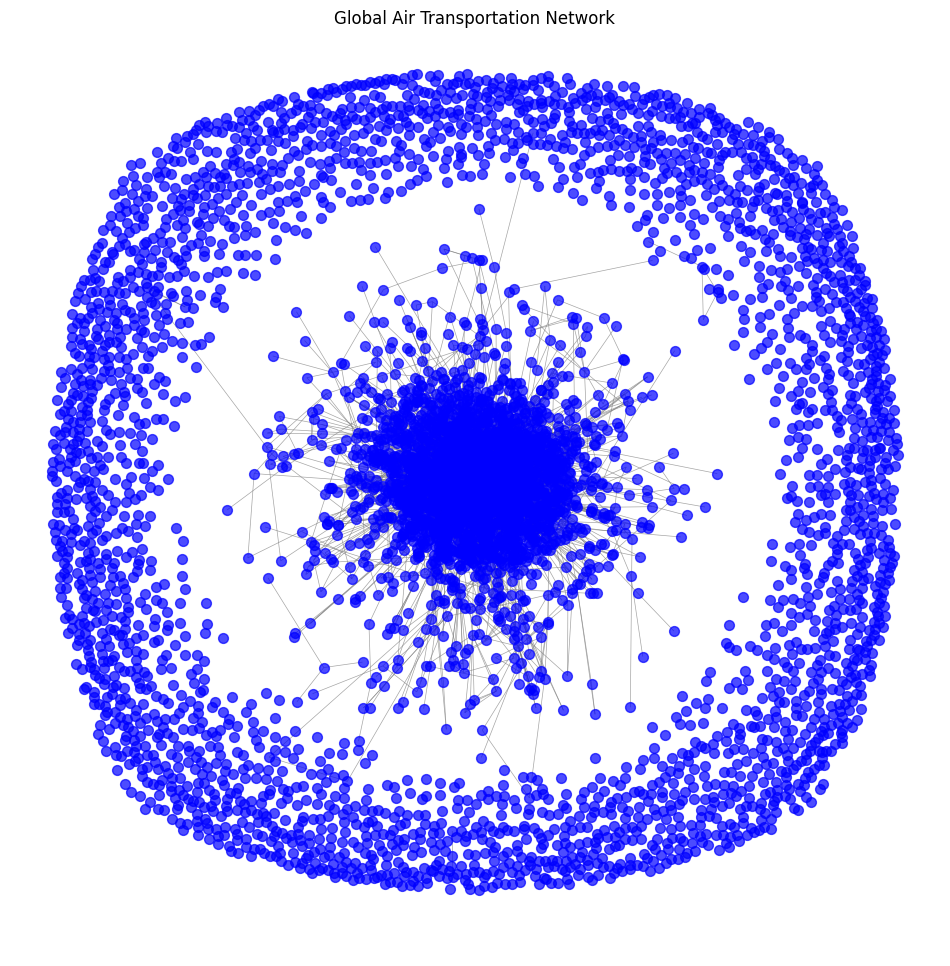

In [17]:
import matplotlib.pyplot as plt

# Create the layout for positioning the nodes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout for node positions

# Draw the nodes (airports)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)

# Draw the edges (routes) with labels (optional, to make them visible)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7, edge_color='gray')

# Optional: Draw edge labels (e.g., the weight/distance of the routes)
"""edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)"""

# Draw the node labels (airport codes)
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Title and display the graph
plt.title("Global Air Transportation Network")
plt.axis('off')  # Turn off axis
plt.show()


In [18]:
# Get the number of nodes (airports) and edges (routes)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Display the results
print(f"Number of nodes (airports): {num_nodes}")
print(f"Number of edges (routes): {num_edges}")


Number of nodes (airports): 6073
Number of edges (routes): 18931


In [19]:
# Optionally save preprocessed data
routes.to_csv('preprocessed_routes.csv', index=False)

# Saving the network graph
nx.write_gml(G, 'global_air_transportation_network.gml')

Finding the Largest Connected Component

In [20]:
# Find the largest connected component
largest_component = max(nx.connected_components(G), key=len)

# Subgraph containing only the largest connected component
G_largest = G.subgraph(largest_component).copy()

# Get the number of nodes and edges in the largest component
num_nodes_largest = G_largest.number_of_nodes()
num_edges_largest = G_largest.number_of_edges()

print(f"Number of nodes in the largest connected component: {num_nodes_largest}")
print(f"Number of edges in the largest connected component: {num_edges_largest}")


Number of nodes in the largest connected component: 3231
Number of edges in the largest connected component: 18906


Number of nodes (airports): You will get the total number of airports in your dataset.
Number of edges (routes): You will get the total number of flight routes connecting these airports.

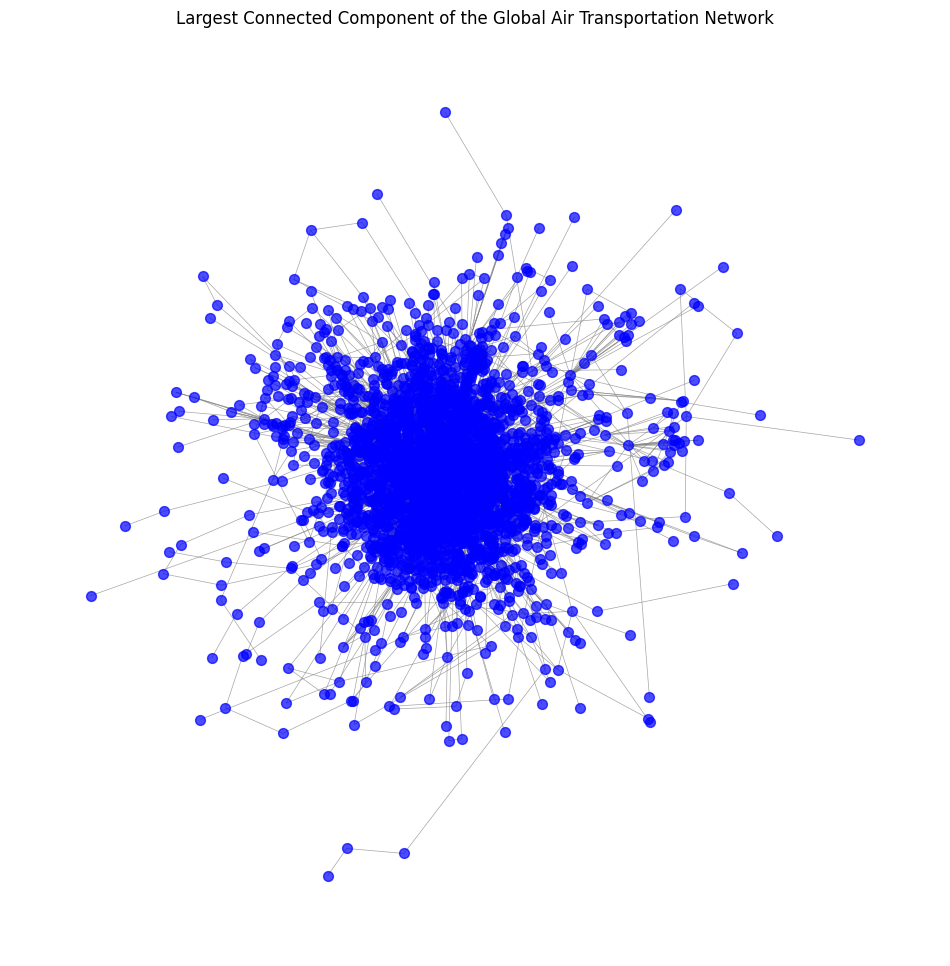

In [21]:
# Create the layout for positioning the nodes
plt.figure(figsize=(12, 12))
pos_largest = nx.spring_layout(G_largest, k=0.15, iterations=20)  # Layout for node positions

# Draw the nodes of the largest connected component
nx.draw_networkx_nodes(G_largest, pos_largest, node_size=50, node_color='blue', alpha=0.7)

# Draw the edges of the largest connected component
nx.draw_networkx_edges(G_largest, pos_largest, width=0.5, alpha=0.7, edge_color='gray')

# Optional: Draw edge labels (e.g., the weight/distance of the routes)
"""edge_labels_largest = nx.get_edge_attributes(G_largest, 'weight')
nx.draw_networkx_edge_labels(G_largest, pos_largest, edge_labels=edge_labels_largest, font_size=8)
"""
# Draw the node labels (airport codes)
#nx.draw_networkx_labels(G_largest, pos_largest, font_size=10, font_color='black')

# Title and display the graph
plt.title("Largest Connected Component of the Global Air Transportation Network")
plt.axis('off')  # Turn off axis
plt.show()


Network Construction Using Number of Flights as Weight

In [22]:
# Aggregate the number of flights between airports
routes['route'] = list(zip(routes['Source airport'], routes['Destination airport']))
flight_counts = routes['route'].value_counts().reset_index()
flight_counts.columns = ['route', 'count']

# Extract source, destination, and count
flight_counts[['source', 'destination']] = pd.DataFrame(flight_counts['route'].tolist(), index=flight_counts.index)
flight_counts.drop(columns=['route'], inplace=True)


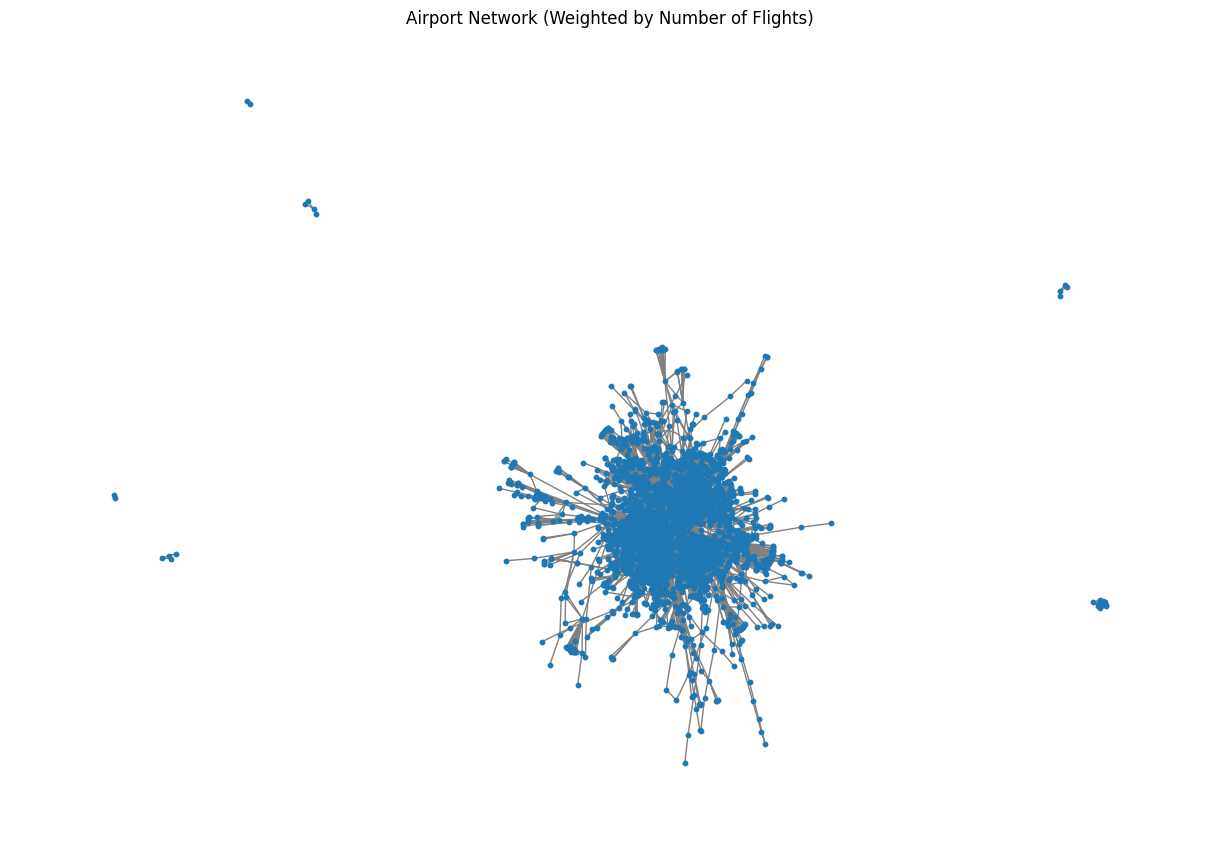

In [23]:
# Create graph with number of flights as weights
G_flights = nx.Graph()

# Add edges with weights based on flight count
for _, row in flight_counts.iterrows():
    G_flights.add_edge(row['source'], row['destination'], weight=row['count'])

# Basic visualization
plt.figure(figsize=(12, 8))
nx.draw(G_flights, node_size=10, edge_color='gray', with_labels=False)
plt.title("Airport Network (Weighted by Number of Flights)")
plt.show()


Network Construction Using Distance as Weight

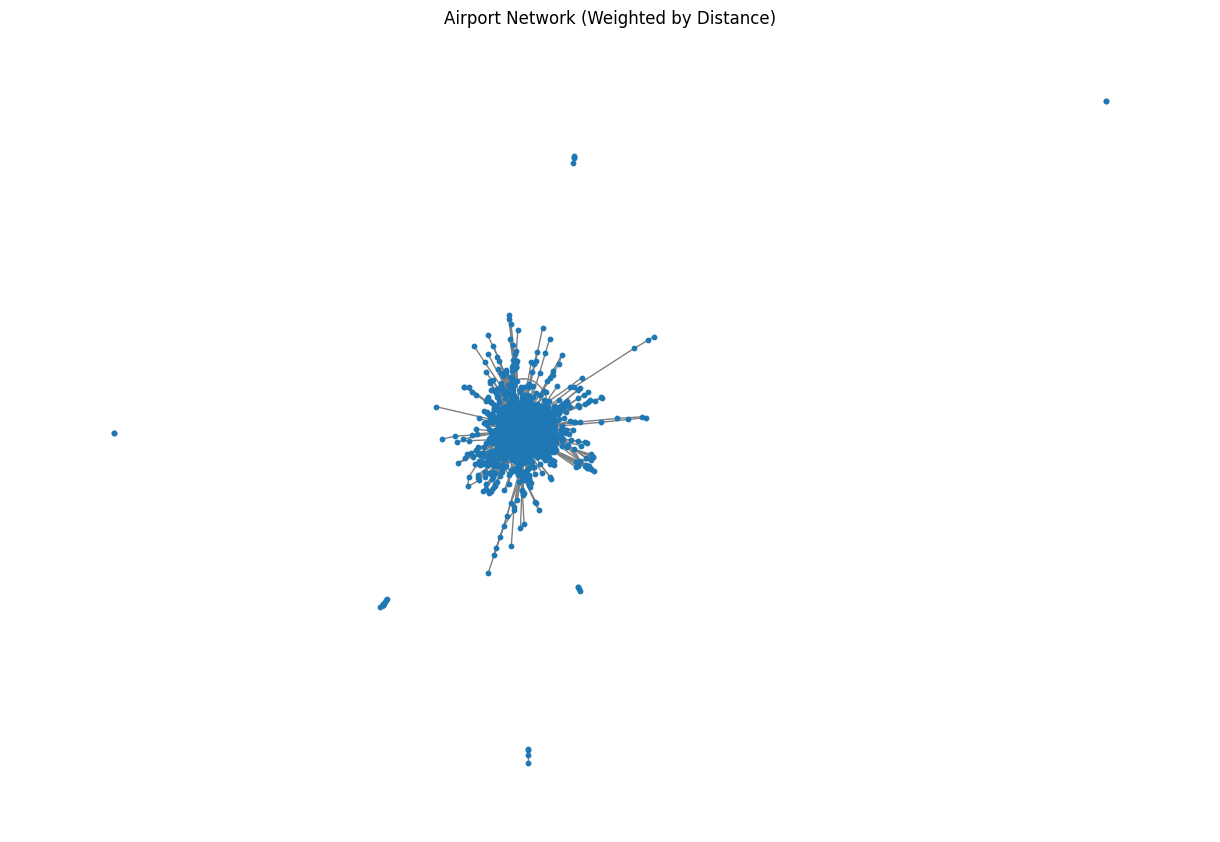

In [24]:
# Create graph with distance as weights
G_distance = nx.Graph()

# Add edges with weights based on distance
for _, row in routes.iterrows():
    G_distance.add_edge(row['Source airport'], row['Destination airport'], weight=row['distance_km'])

# Basic visualization
plt.figure(figsize=(12, 8))
nx.draw(G_distance, node_size=10, edge_color='gray', with_labels=False)
plt.title("Airport Network (Weighted by Distance)")
plt.show()


In [25]:
def analyze_network(G, weight_name):
    # Degree distribution
    degree_distribution = [d for _, d in G.degree()]
    average_degree = np.mean(degree_distribution)

    # Density
    density = nx.density(G)

    # Clustering coefficient
    average_clustering = nx.average_clustering(G)

    # Centrality measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    closeness_centrality = nx.closeness_centrality(G)

    # Summary
    print(f"--- Network Analysis ({weight_name}) ---")
    print(f"Average Degree: {average_degree}")
    print(f"Density: {density}")
    print(f"Average Clustering Coefficient: {average_clustering}")
    print(f"Top 5 Degree Centrality Nodes: {sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}")
    print(f"Top 5 Betweenness Centrality Nodes: {sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}")
    print(f"Top 5 Closeness Centrality Nodes: {sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}")


In [26]:
analyze_network(G_flights, "Number of Flights")
analyze_network(G_distance, "Distance")

--- Network Analysis (Number of Flights) ---
Average Degree: 11.624808105618667
Density: 0.003570272759710893
Average Clustering Coefficient: 0.48792449208680305
Top 5 Degree Centrality Nodes: [('AMS', 0.07616707616707616), ('FRA', 0.07493857493857493), ('CDG', 0.07371007371007371), ('IST', 0.07217444717444717), ('ATL', 0.06664619164619165)]
Top 5 Betweenness Centrality Nodes: [('ANC', 0.05863303987794298), ('DOH', 0.05850072564811466), ('HNL', 0.05121570770014965), ('YYZ', 0.0489381038494319), ('IAH', 0.04245000391131053)]
Top 5 Closeness Centrality Nodes: [('FRA', 0.41026986129418913), ('CDG', 0.40786756831817933), ('LHR', 0.40544193555708175), ('AMS', 0.4010272361336191), ('DXB', 0.40012582626218995)]
--- Network Analysis (Distance) ---
Average Degree: 11.624808105618667
Density: 0.003570272759710893
Average Clustering Coefficient: 0.48792449208680244
Top 5 Degree Centrality Nodes: [('AMS', 0.07616707616707616), ('FRA', 0.07493857493857493), ('CDG', 0.07371007371007371), ('IST', 0.0

In [27]:
# Define the function to compute network metrics
def compute_metrics(G):
    metrics = {}
    metrics['Number of Nodes'] = G.number_of_nodes()
    metrics['Number of Edges'] = G.number_of_edges()
    metrics['Average Degree'] = sum(dict(G.degree()).values()) / G.number_of_nodes()
    metrics['Clustering Coefficient'] = nx.average_clustering(G)
    
    # Check for connected components and compute diameter only for the largest connected component
    if nx.is_connected(G):
        metrics['Diameter'] = nx.diameter(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        metrics['Diameter'] = nx.diameter(subgraph)
    
    metrics['Density'] = nx.density(G)
    metrics['Average Path Length'] = nx.average_shortest_path_length(G.subgraph(largest_cc))
    return metrics

# Compute metrics for the graph with flights as weights
metrics_flights = compute_metrics(G_flights)

# Compute metrics for the graph with distance as weights
metrics_distance = compute_metrics(G_distance)

# Compare metrics
comparison = pd.DataFrame({
    'Metric': ['Number of Nodes', 'Number of Edges', 'Average Degree', 
               'Clustering Coefficient', 'Diameter', 'Density', 'Average Path Length'],
    'Flights Network': [metrics_flights['Number of Nodes'], metrics_flights['Number of Edges'], metrics_flights['Average Degree'],
                        metrics_flights['Clustering Coefficient'], metrics_flights['Diameter'], 
                        metrics_flights['Density'], metrics_flights['Average Path Length']],
    'Distance Network': [metrics_distance['Number of Nodes'], metrics_distance['Number of Edges'], metrics_distance['Average Degree'],
                         metrics_distance['Clustering Coefficient'], metrics_distance['Diameter'], 
                         metrics_distance['Density'], metrics_distance['Average Path Length']]
})

# Display the comparison
print(comparison)


                   Metric  Flights Network  Distance Network
0         Number of Nodes      3257.000000       3257.000000
1         Number of Edges     18931.000000      18931.000000
2          Average Degree        11.624808         11.624808
3  Clustering Coefficient         0.487924          0.487924
4                Diameter        12.000000         12.000000
5                 Density         0.003570          0.003570
6     Average Path Length         3.967122          3.967122


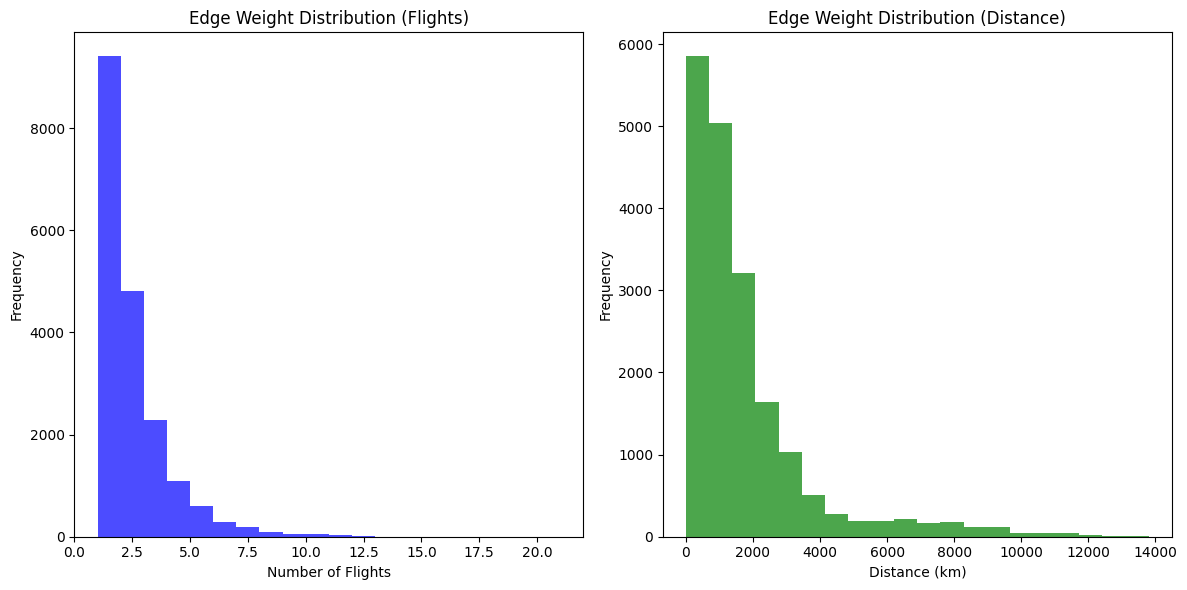

In [28]:
# Visualize edge weights distribution for both networks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
weights_flights = [data['weight'] for _, _, data in G_flights.edges(data=True)]
plt.hist(weights_flights, bins=20, color='blue', alpha=0.7)
plt.title("Edge Weight Distribution (Flights)")
plt.xlabel("Number of Flights")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
weights_distance = [data['weight'] for _, _, data in G_distance.edges(data=True)]
plt.hist(weights_distance, bins=20, color='green', alpha=0.7)
plt.title("Edge Weight Distribution (Distance)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

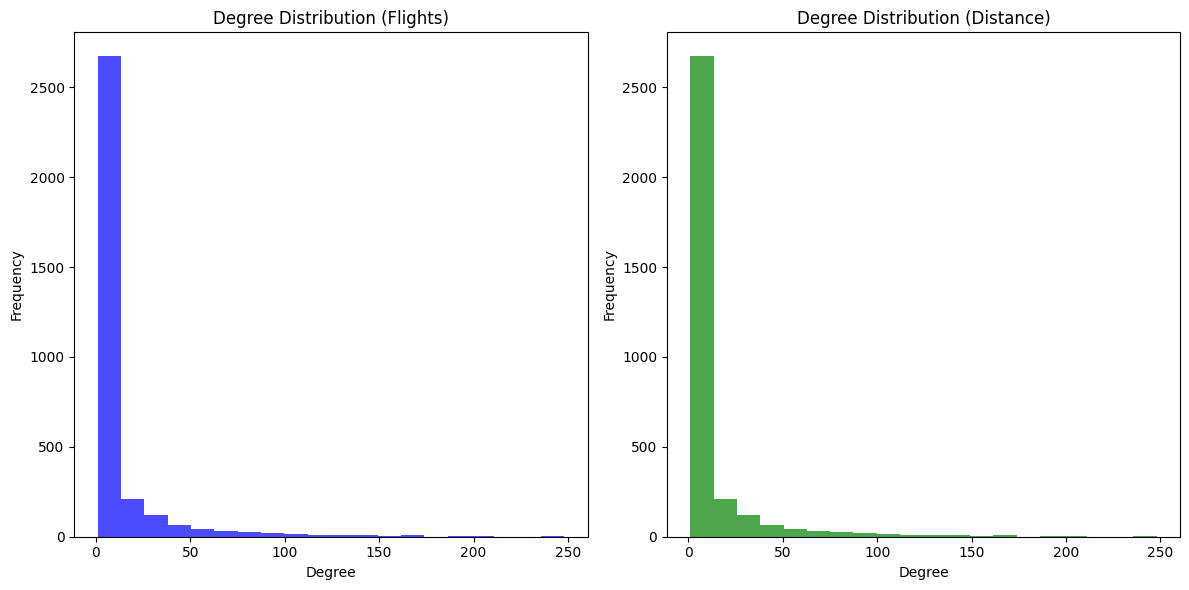

In [29]:
# Visualize degree distribution for both networks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
degrees_flights = [val for (_, val) in G_flights.degree()]
plt.hist(degrees_flights, bins=20, color='blue', alpha=0.7)
plt.title("Degree Distribution (Flights)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
degrees_distance = [val for (_, val) in G_distance.degree()]
plt.hist(degrees_distance, bins=20, color='green', alpha=0.7)
plt.title("Degree Distribution (Distance)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Is the network directed? False
Nodes (N): 3231
Edges (E): 18906
Density: 0.0036
Is the network sparse? True


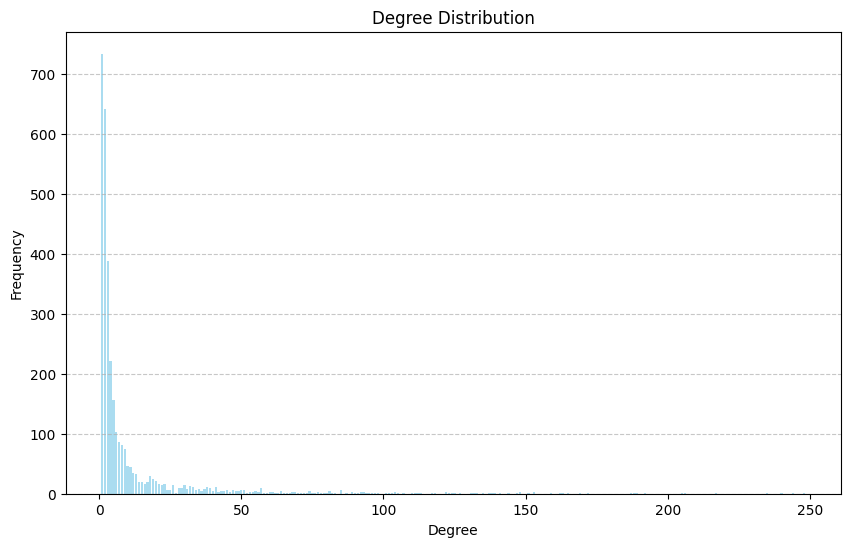

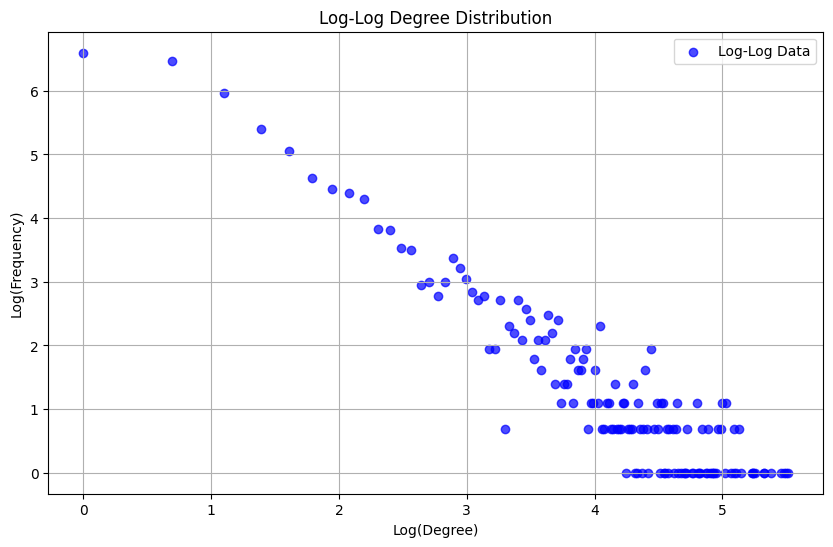

Power-law Slope: -1.3557, R-squared: 0.8915
Global Clustering Coefficient: 0.4889
Is the network connected? True
Network Diameter: 12
Average Path Length: 3.967121720407852
Modularity Score (Louvain): 0.6644


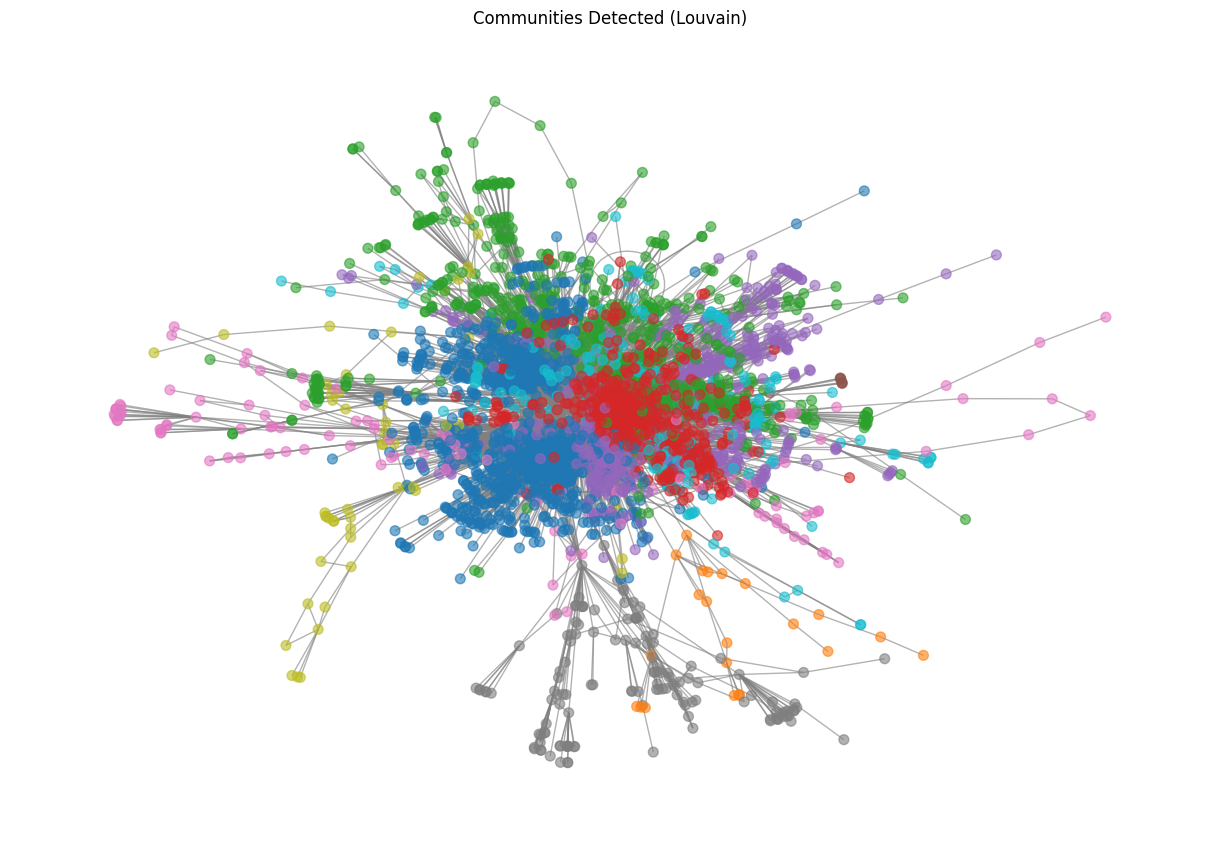

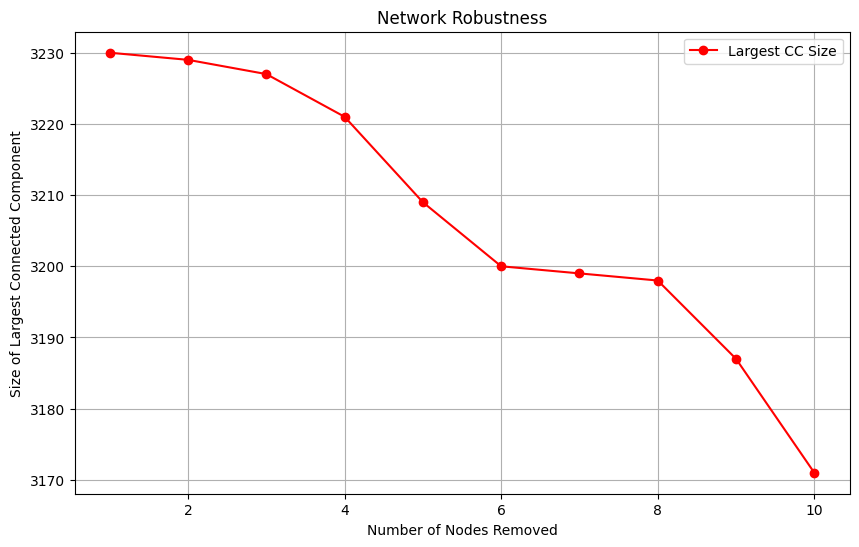

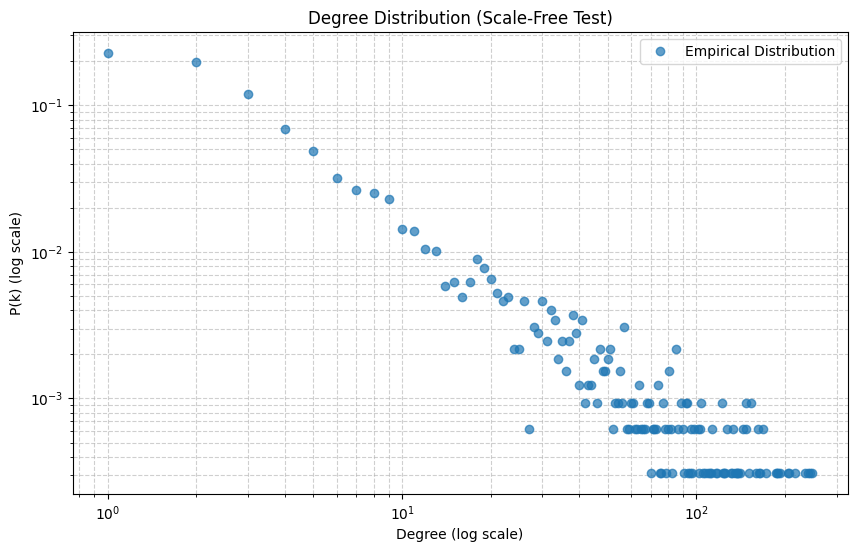

Random Graph Clustering Coefficient: 0.0036
Random Graph Average Path Length: 3.5665791821297743
Small-World Index: 120.7142
Top 5 Nodes by Degree Centrality: [('AMS', 0.07678018575851393), ('FRA', 0.07554179566563468), ('CDG', 0.07430340557275542), ('IST', 0.07275541795665635), ('ATL', 0.0671826625386997)]
Top 5 Nodes by Betweenness Centrality: [('CDG', 0.06458647000107147), ('LAX', 0.06076737851949217), ('ANC', 0.058596816072265585), ('DXB', 0.057292646602835715), ('FRA', 0.05305557587185769)]
Top 5 Nodes by Closeness Centrality: [('FRA', 0.41357234314980795), ('CDG', 0.4111507128309572), ('LHR', 0.40870555485258764), ('AMS', 0.40425531914893614), ('DXB', 0.40334665334665337)]

Network Summary:
Nodes: 3231
Edges: 18906
Density: 0.0036231821566040283
Is Sparse: True
Is Connected: True
Diameter: 12
Average Path Length: 3.967121720407852
Global Clustering Coefficient: 0.4889363677066082
Modularity Score: 0.6644348021611931
Small-World Index: 120.714238515445
Power-law Slope: -1.35566988

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from community import community_louvain
from scipy.stats import binom, poisson, linregress
import numpy as np
import pandas as pd

# Extract the largest connected component
largest_cc = max(nx.connected_components(G_flights), key=len)
G_largest = G_flights.subgraph(largest_cc)

# ---------------------------
# 1. Definition of the Network
# ---------------------------
is_directed = nx.is_directed(G_largest)
print(f"Is the network directed? {is_directed}")

# ---------------------------
# 2. Basic Metrics
# ---------------------------
N = G_largest.number_of_nodes()  # Number of nodes
E = G_largest.number_of_edges()  # Number of edges
density = nx.density(G_largest)  # Density of the network
is_sparse = density < 0.05  # Assume sparsity if density < 5%

print(f"Nodes (N): {N}")
print(f"Edges (E): {E}")
print(f"Density: {density:.4f}")
print(f"Is the network sparse? {is_sparse}")

# ---------------------------
# 3. Degree Distribution
# ---------------------------
degree_sequence = [d for _, d in G_largest.degree()]
degree_count = Counter(degree_sequence)
degrees, counts = zip(*sorted(degree_count.items()))

plt.figure(figsize=(10, 6))
plt.bar(degrees, counts, color='skyblue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Log-log plot
log_degrees = np.log(degrees)
log_counts = np.log(counts)

plt.figure(figsize=(10, 6))
plt.scatter(log_degrees, log_counts, c='blue', alpha=0.7, label="Log-Log Data")
plt.title("Log-Log Degree Distribution")
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Frequency)")
plt.grid()
plt.legend()
plt.show()

# Fit a power-law distribution
slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)
print(f"Power-law Slope: {slope:.4f}, R-squared: {r_value**2:.4f}")

# ---------------------------
# 4. Clustering Coefficient
# ---------------------------
global_clustering = nx.average_clustering(G_largest)
print(f"Global Clustering Coefficient: {global_clustering:.4f}")

# ---------------------------
# 5. Connectedness and Diameter
# ---------------------------
is_connected = nx.is_connected(G_largest)
if is_connected:
    diameter = nx.diameter(G_largest)
    avg_path_length = nx.average_shortest_path_length(G_largest)
else:
    diameter = None
    avg_path_length = None

print(f"Is the network connected? {is_connected}")
print(f"Network Diameter: {diameter}")
print(f"Average Path Length: {avg_path_length}")

# ---------------------------
# 6. Community Detection
# ---------------------------
partition_louvain = community_louvain.best_partition(G_largest)
modularity_score = nx.algorithms.community.quality.modularity(
    G_largest,
    [{node for node, comm in partition_louvain.items() if comm == c} for c in set(partition_louvain.values())]
)

print(f"Modularity Score (Louvain): {modularity_score:.4f}")

# Community visualization
pos = nx.spring_layout(G_largest, seed=42)
community_colors = [partition_louvain[node] for node in G_largest.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(
    G_largest, pos,
    node_color=community_colors, cmap=plt.cm.tab10,
    node_size=50, edge_color='gray', alpha=0.6
)
plt.title("Communities Detected (Louvain)")
plt.show()

# ---------------------------
# 7. Robustness Test
# ---------------------------
# Removing top 10 highest-degree nodes
G_robustness = G_largest.copy()
removed_nodes = []
largest_cc_sizes = []

top_nodes_by_degree = sorted(G_largest.degree, key=lambda x: x[1], reverse=True)[:10]
for node, _ in top_nodes_by_degree:
    G_robustness.remove_node(node)
    removed_nodes.append(node)
    largest_cc_sizes.append(len(max(nx.connected_components(G_robustness), key=len)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(largest_cc_sizes) + 1), largest_cc_sizes, marker='o', color='red', label="Largest CC Size")
plt.title("Network Robustness")
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Connected Component")
plt.legend()
plt.grid()
plt.show()

# ---------------------------
# 8. Scale-Free Property
# ---------------------------
degree_histogram = nx.degree_histogram(G_largest)
k = np.arange(len(degree_histogram))
pk = np.array(degree_histogram) / sum(degree_histogram)

plt.figure(figsize=(10, 6))
plt.loglog(k[k > 0], pk[k > 0], marker='o', linestyle='', alpha=0.7, label="Empirical Distribution")
plt.title("Degree Distribution (Scale-Free Test)")
plt.xlabel("Degree (log scale)")
plt.ylabel("P(k) (log scale)")
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.show()

# ---------------------------
# 9. Small World Property
# ---------------------------
# Compare average path length and clustering coefficient
random_graph = nx.erdos_renyi_graph(N, density)
random_clustering = nx.average_clustering(random_graph)
random_path_length = nx.average_shortest_path_length(random_graph) if nx.is_connected(random_graph) else None

print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")
print(f"Random Graph Average Path Length: {random_path_length}")

small_world_index = (global_clustering / random_clustering) / (avg_path_length / random_path_length if random_path_length else 1)
print(f"Small-World Index: {small_world_index:.4f}")

# ---------------------------
# 10. Centrality Measures
# ---------------------------
degree_centrality = nx.degree_centrality(G_largest)
betweenness_centrality = nx.betweenness_centrality(G_largest)
closeness_centrality = nx.closeness_centrality(G_largest)

top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Nodes by Degree Centrality:", top_5_degree)
print("Top 5 Nodes by Betweenness Centrality:", top_5_betweenness)
print("Top 5 Nodes by Closeness Centrality:", top_5_closeness)

# ---------------------------
# Summary of the Analysis
# ---------------------------
summary = {
    "Nodes": N,
    "Edges": E,
    "Density": density,
    "Is Sparse": is_sparse,
    "Is Connected": is_connected,
    "Diameter": diameter,
    "Average Path Length": avg_path_length,
    "Global Clustering Coefficient": global_clustering,
    "Modularity Score": modularity_score,
    "Small-World Index": small_world_index,
    "Power-law Slope": slope,
    "Power-law R-squared": r_value**2
}

print("\nNetwork Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


Number of Nodes in Largest Component: 3231
Number of Edges in Largest Component: 18906

--- Original Network Network ---
Nodes: 3231, Edges: 18906
Density: 0.0036
Clustering Coefficient: 0.4889
Diameter: 12
Average Path Length: 3.967121720407852


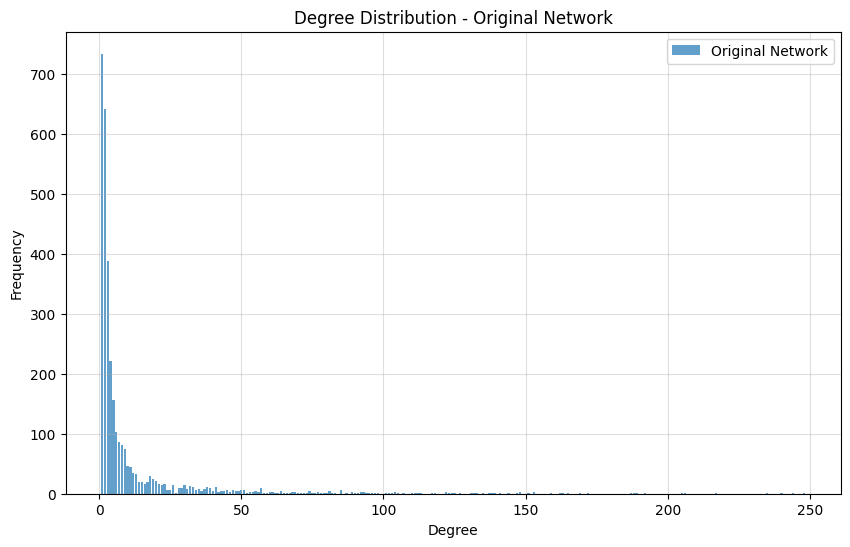


--- Barabási-Albert Model Network ---
Nodes: 3231, Edges: 16130
Density: 0.0031
Clustering Coefficient: 0.0148
Diameter: 5
Average Path Length: 3.3699118351342885


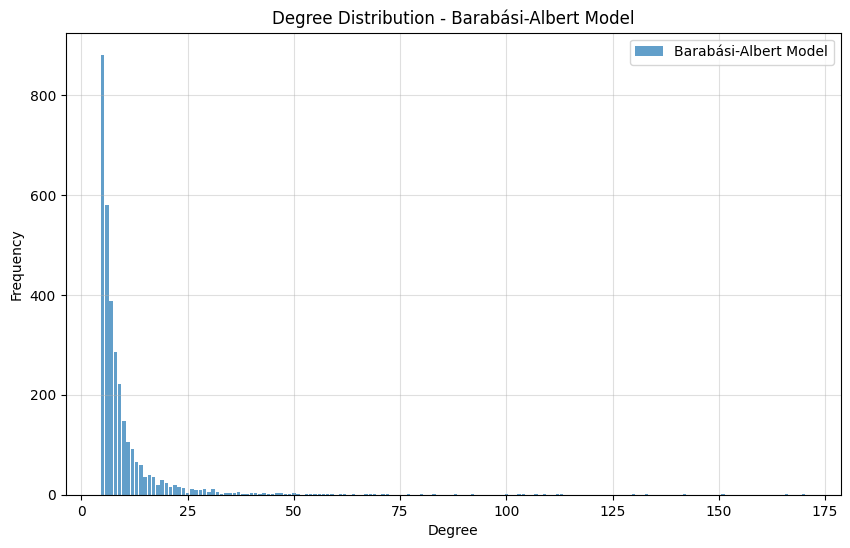


--- Erdős-Rényi Model Network ---
Nodes: 3231, Edges: 9524
Density: 0.0018
Clustering Coefficient: 0.0022
Diameter: None
Average Path Length: None


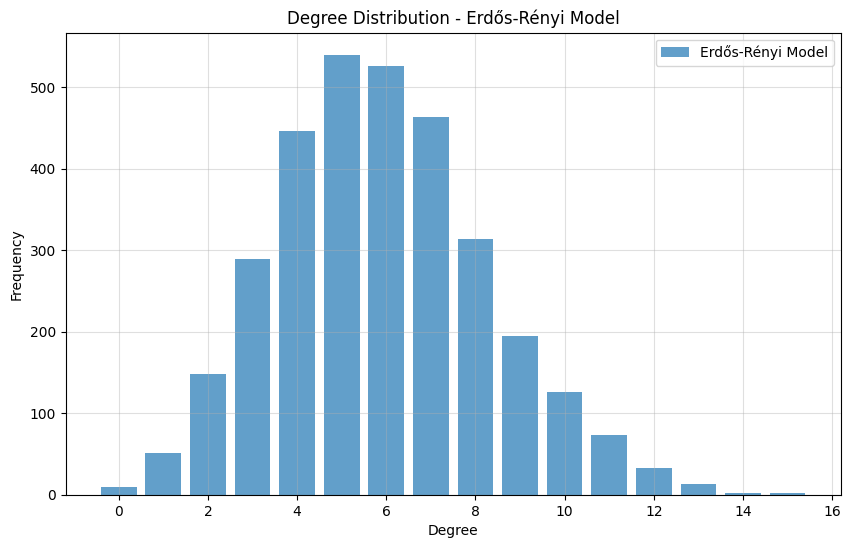


--- Bianco Model Network ---
Nodes: 3231, Edges: 6462
Density: 0.0012
Clustering Coefficient: 0.0044
Diameter: 9
Average Path Length: 4.8518117348097425


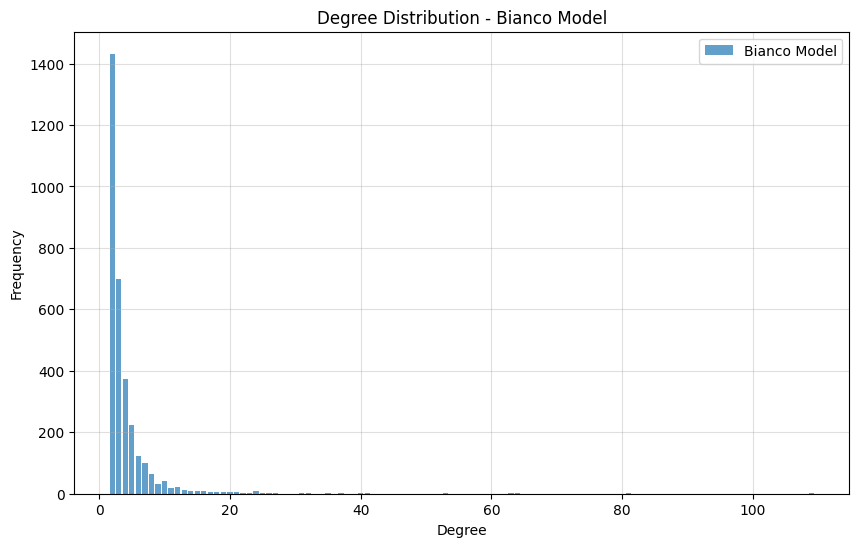

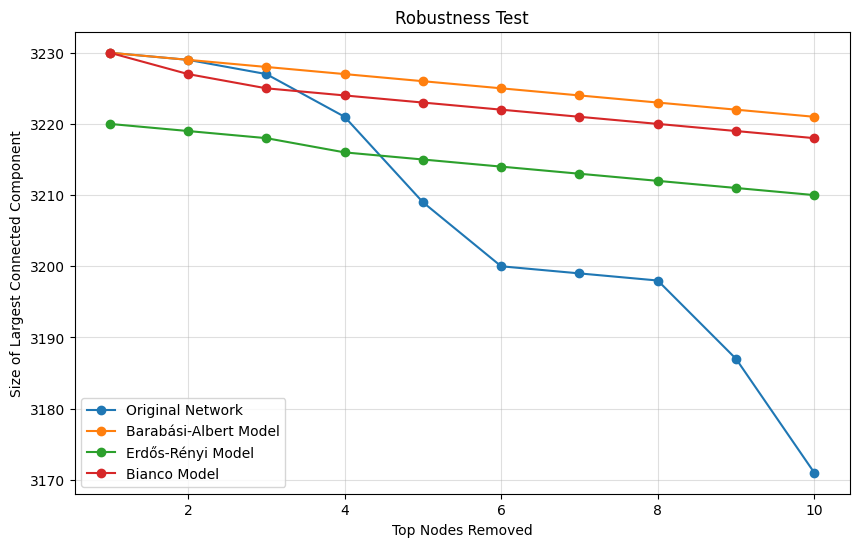


Original Network Degree Assortativity Coefficient: -0.0175

Barabási-Albert Model Degree Assortativity Coefficient: -0.0324

Erdős-Rényi Model Degree Assortativity Coefficient: 0.0015

Bianco Model Degree Assortativity Coefficient: -0.0053

Cascade Behavior Results (Fraction of Nodes Infected):
Original Network: 0.0003
Barabási-Albert Model: 0.2959
Erdős-Rényi Model: 0.0006
Bianco Model: 0.0003

--- Realistic Model Network ---
Nodes: 3559, Edges: 21441
Density: 0.0034
Clustering Coefficient: 0.2911
Diameter: 9
Average Path Length: 3.706876817214858


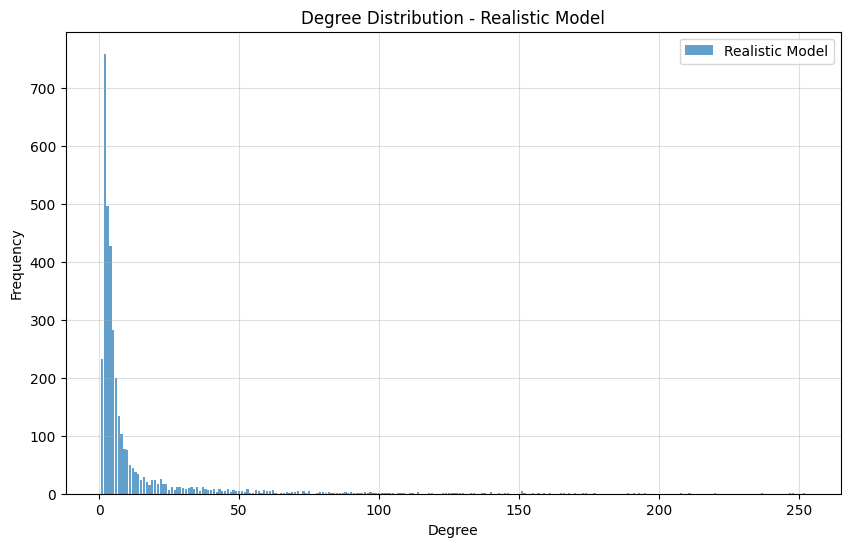

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# ---------------------------
# Extract the Largest Connected Component
# ---------------------------
largest_cc = max(nx.connected_components(G_flights), key=len)
G_largest = G_flights.subgraph(largest_cc).copy()

N = G_largest.number_of_nodes()
E = G_largest.number_of_edges()

print(f"Number of Nodes in Largest Component: {N}")
print(f"Number of Edges in Largest Component: {E}")

# ---------------------------
# 1. Generate Models
# ---------------------------

# Barabási-Albert Model (Preferential Attachment)
G_ba = nx.barabasi_albert_graph(N, max(E // N, 1))  # Using m = avg degree (E/N)

# Erdős-Rényi Model (Random Graph)
p_er = E / (N * (N - 1))  # Probability for ER model
G_er = nx.erdos_renyi_graph(N, p_er)

# Custom Bianco-like Model (Customized Preferential Attachment)
# Variation: Start with a small clique and attach nodes based on random and degree-based rules
G_bianco = nx.complete_graph(5)  # Start with a small complete graph (K_5)
for _ in range(N - 5):
    target_nodes = list(G_bianco.nodes())
    degree_weights = [G_bianco.degree(n) + 1 for n in target_nodes]  # Avoid zero probabilities
    chosen_nodes = np.random.choice(target_nodes, 2, p=np.array(degree_weights) / sum(degree_weights), replace=False)
    G_bianco.add_node(len(G_bianco.nodes()))
    G_bianco.add_edges_from([(len(G_bianco.nodes()) - 1, node) for node in chosen_nodes])

# ---------------------------
# 2. Compare Network Properties
# ---------------------------

def analyze_network_properties(G, model_name):
    """Function to analyze key network properties."""
    print(f"\n--- {model_name} Network ---")
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = nx.density(G)
    clustering_coeff = nx.average_clustering(G)
    degree_sequence = [d for _, d in G.degree()]
    
    # Calculate Diameter and Average Path Length
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        avg_path_length = nx.average_shortest_path_length(G)
    else:
        diameter = None
        avg_path_length = None

    print(f"Nodes: {num_nodes}, Edges: {num_edges}")
    print(f"Density: {density:.4f}")
    print(f"Clustering Coefficient: {clustering_coeff:.4f}")
    print(f"Diameter: {diameter}")
    print(f"Average Path Length: {avg_path_length}")

    # Degree Distribution
    degree_count = Counter(degree_sequence)
    degrees, counts = zip(*sorted(degree_count.items()))
    
    plt.figure(figsize=(10, 6))
    plt.bar(degrees, counts, alpha=0.7, label=model_name)
    plt.title(f"Degree Distribution - {model_name}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.4)
    plt.legend()
    plt.show()

# Analyze Original Network
analyze_network_properties(G_largest, "Original Network")

# Analyze Barabási-Albert Model
analyze_network_properties(G_ba, "Barabási-Albert Model")

# Analyze Erdős-Rényi Model
analyze_network_properties(G_er, "Erdős-Rényi Model")

# Analyze Bianco Model
analyze_network_properties(G_bianco, "Bianco Model")

# ---------------------------
# 3. Robustness Analysis
# ---------------------------

def robustness_test(G, model_name):
    """Test network robustness by removing high-degree nodes."""
    G_copy = G.copy()
    largest_cc_sizes = []
    top_nodes = sorted(G_copy.degree, key=lambda x: x[1], reverse=True)
    
    for node, _ in top_nodes[:10]:  # Remove top 10 nodes by degree
        G_copy.remove_node(node)
        largest_cc = max(nx.connected_components(G_copy), key=len)
        largest_cc_sizes.append(len(largest_cc))
    
    plt.plot(range(1, 11), largest_cc_sizes, marker='o', label=model_name)
    plt.title("Robustness Test")
    plt.xlabel("Top Nodes Removed")
    plt.ylabel("Size of Largest Connected Component")
    plt.grid(alpha=0.4)

# Perform robustness tests
plt.figure(figsize=(10, 6))
robustness_test(G_largest, "Original Network")
robustness_test(G_ba, "Barabási-Albert Model")
robustness_test(G_er, "Erdős-Rényi Model")
robustness_test(G_bianco, "Bianco Model")
plt.legend()
plt.show()

# ---------------------------
# 4. Correlation Analysis
# ---------------------------

def degree_assortativity_analysis(G, model_name):
    """Calculate degree assortativity and mixing patterns."""
    assortativity = nx.degree_assortativity_coefficient(G)
    print(f"\n{model_name} Degree Assortativity Coefficient: {assortativity:.4f}")

# Assortativity for all models
degree_assortativity_analysis(G_largest, "Original Network")
degree_assortativity_analysis(G_ba, "Barabási-Albert Model")
degree_assortativity_analysis(G_er, "Erdős-Rényi Model")
degree_assortativity_analysis(G_bianco, "Bianco Model")

# ---------------------------
# 5. Cascade Behavior Simulation
# ---------------------------

def simulate_cascade(G, infection_prob=0.1):
    """Simulate a simple cascade model."""
    # Start with one infected node
    initial_node = np.random.choice(list(G.nodes()))
    infected = set([initial_node])
    newly_infected = set([initial_node])
    
    while newly_infected:
        next_infected = set()
        for node in newly_infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in infected and np.random.rand() < infection_prob:
                    next_infected.add(neighbor)
        newly_infected = next_infected
        infected.update(newly_infected)
    
    return len(infected) / G.number_of_nodes()

# Simulate cascades for each network
cascade_results = {
    "Original Network": simulate_cascade(G_largest),
    "Barabási-Albert Model": simulate_cascade(G_ba),
    "Erdős-Rényi Model": simulate_cascade(G_er),
    "Bianco Model": simulate_cascade(G_bianco)
}

print("\nCascade Behavior Results (Fraction of Nodes Infected):")
for model, fraction_infected in cascade_results.items():
    print(f"{model}: {fraction_infected:.4f}")

# ---------------------------
# 6. Building a Realistic Model
# ---------------------------

def build_realistic_model(G):
    """Modify the original network to make it more realistic."""
    # Increase clustering: Add random triadic closures
    for _ in range(E // 10):  # Add ~10% new edges
        nodes = list(G.nodes())
        u = np.random.choice(nodes)
        v = np.random.choice(list(nx.neighbors(G, u)))
        w = np.random.choice(list(nx.non_neighbors(G, u)))
        if not G.has_edge(u, w):
            G.add_edge(u, w)
    
    # Simulate preferential attachment for additional growth
    for _ in range(N // 10):  # Add 10% new nodes
        new_node = len(G.nodes())
        target_nodes = np.random.choice(
            list(G.nodes()),
            2,
            p=np.array([d + 1 for _, d in G.degree()]) / sum([d + 1 for _, d in G.degree()])
        )
        G.add_node(new_node)
        for target in target_nodes:
            G.add_edge(new_node, target)

    return G

# Apply realistic model
G_realistic = build_realistic_model(G_largest.copy())
analyze_network_properties(G_realistic, "Realistic Model")



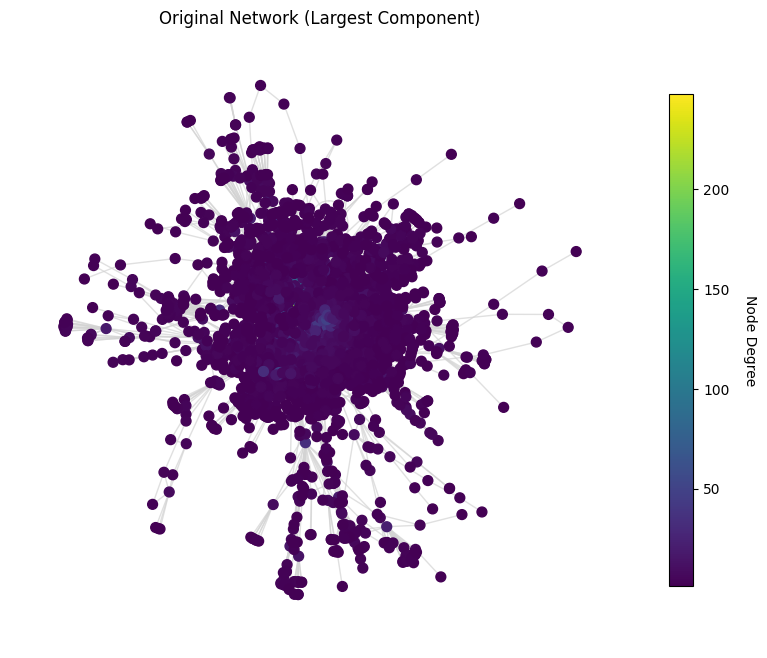

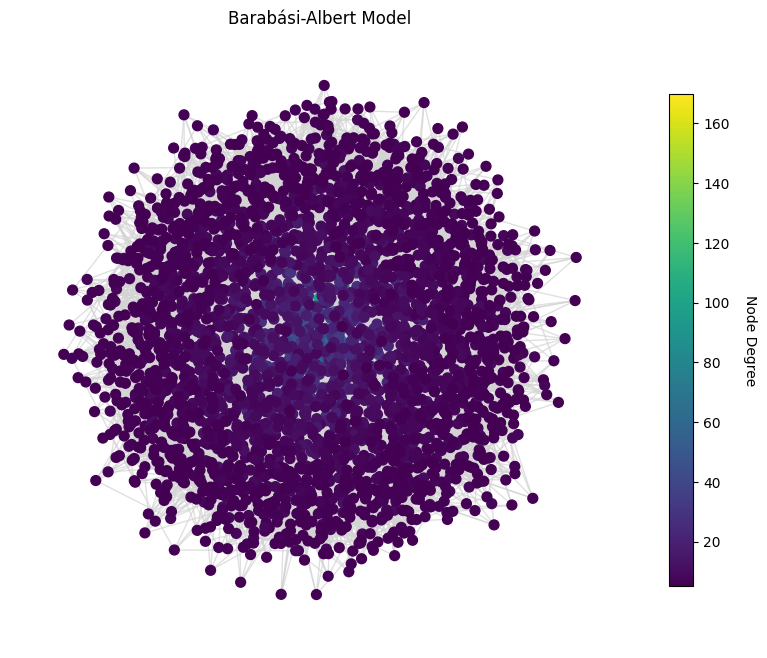

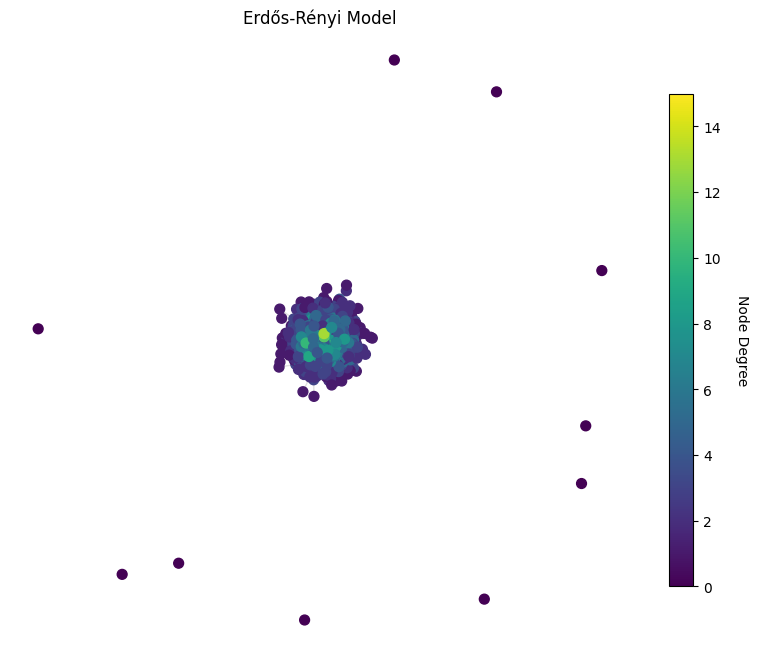

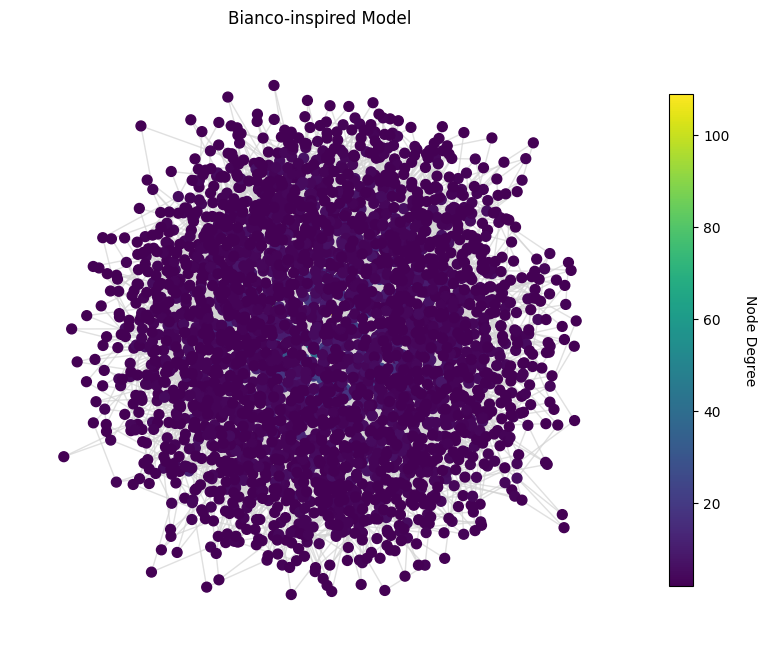

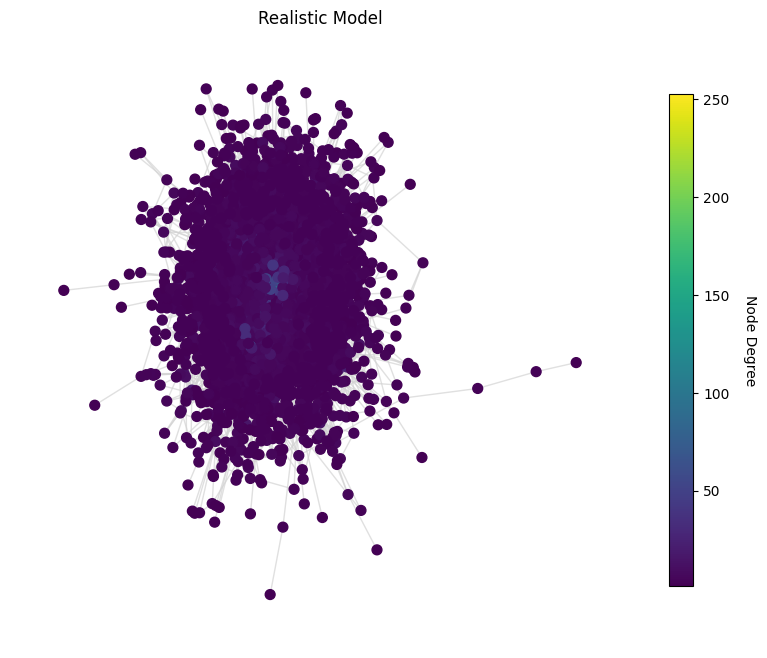

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Visualization function with corrected colorbar implementation
def visualize_network(G, title):
    """Visualizes the network with node colors based on degree and adds a colorbar."""
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for reproducibility
    node_colors = [G.degree(n) for n in G.nodes()]  # Node color by degree

    # Draw the network
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        cmap=plt.cm.viridis,
        node_size=50
    )
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', alpha=0.7)
    
    # Add title
    plt.title(title)
    
    # Add colorbar
    cbar = plt.colorbar(nodes, shrink=0.8)
    cbar.set_label("Node Degree", rotation=270, labelpad=20)
    
    plt.axis('off')  # Hide axes
    plt.show()

# Visualize the Original Network
visualize_network(G_largest, "Original Network (Largest Component)")

# Visualize the Barabási-Albert Model
visualize_network(G_ba, "Barabási-Albert Model")

# Visualize the Erdős-Rényi Model
visualize_network(G_er, "Erdős-Rényi Model")

# Visualize the Bianco-inspired Model
visualize_network(G_bianco, "Bianco-inspired Model")

# Build and Visualize the Realistic Model
G_realistic = build_realistic_model(G_largest.copy())
visualize_network(G_realistic, "Realistic Model")
